<a href="https://colab.research.google.com/github/harsh43580/Machine-Learning-Models/blob/main/Sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing **Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing Data

In [ ]:
# Load the CSV
file_path = "/content/Total online-instore sales by product variant - 2025-04-01 - 2025-04-30.csv"
df = pd.read_csv(file_path)

# Quick peek
df.head()


,Product title,Product variant title,Product variant SKU,Net items sold,Gross sales,Discounts,Returns,Net sales,Taxes,Total sales,Orders
0,Doona X Infant Car Seat,Nitro Black,DOO-CAR-00004,6,3279.30,0.00,0.0,3279.30,442.70,3722.00,6
1,Out n About Double Nipper V5,Summit Black,ONA-STR-00047,4,2435.76,0.00,0.0,2435.76,560.24,2996.00,4
2,Out n About Double Nipper V5,Rocksalt Grey,ONA-STR-00043,3,1778.04,-29.63,0.0,1748.41,402.14,2150.55,3
3,Mamas & Papas Cotbed Premium Dual Core + Mattress,Default Title,MAPA-NUA-00155,11,1511.38,-108.48,0.0,1402.90,322.65,1725.55,9
4,Bugaboo Butterfly with Free Travel Bag,Black / Forest Green,BOO-STR-00084,4,1268.28,0.00,0.0,1268.28,291.72,1560.00,4


Top Selling Products by Net Sales

In [ ]:
# Total sales per product
total_sales_per_product = weekly_sales_long.groupby('product_title')['net_items_sold'].sum()

# Sort by total sales to find the best-selling products
total_sales_per_product_sorted = total_sales_per_product.sort_values(ascending=False)

# Show top 10 products
print(total_sales_per_product_sorted.head(10))


product_title
Baby Brezza Bottle Washer Pro Detergent Tablets      15.0
Bugaboo Butterfly Bumper Bar                         13.0
Joie Elevate R129 Car Seat                           12.0
Bugaboo Butterfly with Free Travel Bag               12.0
Rockit Baby Rocker - Rechargeable                    12.0
Mamas & Papas Cotbed Premium Dual Core + Mattress    11.0
UPPAbaby Travel Bag                                   9.0
Out n About Double Nipper V5                          9.0
Doona X Infant Car Seat                               8.0
Babybjorn Baby Carrier Mini - 3D Jersey               7.0
Name: net_items_sold, dtype: float64


In [ ]:
# Step 1: Get top 10 as a DataFrame
top_10_sales_df = total_sales_per_product_sorted.head(10).reset_index()

# Step 2: Rename columns for clarity
top_10_sales_df.columns = ['product_title', 'net_items_sold']

# Step 3: Export to CSV
top_10_sales_df.to_csv("top_10_selling_products_simple.csv", index=False)


In [ ]:
top_10_sales_df.rename(columns={'product_title': 'Product Title'}, inplace=True)


Converting it into weekly Data

In [ ]:
# Sample data: total sales for the entire month (use your monthly data here)
monthly_sales_data = {
    'product_title': [
        'Baby Brezza Bottle Washer Pro Detergent Tablets',
        'Babybjorn Baby Carrier Mini - 3D Jersey',
        'Bugaboo Butterfly Bumper Bar',
        'Bugaboo Butterfly with Free Travel Bag',
        'Doona X Infant Car Seat',
        'Joie Elevate R129 Car Seat',
        'Mamas & Papas Cotbed Premium Dual Core + Mattress',
        'Out n About Double Nipper V5',
        'Rockit Baby Rocker - Rechargeable',
        'UPPAbaby Travel Bag'
    ],
    'total_monthly_sales': [15, 7, 13, 12, 8, 12, 11, 9, 12, 9]
}

# Convert to DataFrame
monthly_sales_df = pd.DataFrame(monthly_sales_data)

# Define weekly weights (adjust these based on your assumption or historical data)
weights = {
    'week_1': 0.25,  # 25% of the total monthly sales
    'week_2': 0.2,   # 20% of the total monthly sales
    'week_3': 0.3,   # 30% of the total monthly sales
    'week_4': 0.25   # 25% of the total monthly sales
}

# Initialize a dictionary to store weighted weekly sales predictions
weekly_sales_predictions = {}

# Calculate weekly sales based on weights
for product in monthly_sales_df['product_title']:
    total_sales = monthly_sales_df[monthly_sales_df['product_title'] == product]['total_monthly_sales'].values[0]

    weekly_sales_predictions[product] = {
        'week_1': total_sales * weights['week_1'],
        'week_2': total_sales * weights['week_2'],
        'week_3': total_sales * weights['week_3'],
        'week_4': total_sales * weights['week_4']
    }

# Convert the weekly predictions to DataFrame
weekly_sales_df = pd.DataFrame(weekly_sales_predictions).T
weekly_sales_df['Product Title'] = weekly_sales_df.index
weekly_sales_df = weekly_sales_df[['Product Title', 'week_1', 'week_2', 'week_3', 'week_4']]

# Print the predicted weekly sales for each product
print(weekly_sales_df)


                                                                                       Product Title  \
Baby Brezza Bottle Washer Pro Detergent Tablets      Baby Brezza Bottle Washer Pro Detergent Tablets   
Babybjorn Baby Carrier Mini - 3D Jersey                      Babybjorn Baby Carrier Mini - 3D Jersey   
Bugaboo Butterfly Bumper Bar                                            Bugaboo Butterfly Bumper Bar   
Bugaboo Butterfly with Free Travel Bag                        Bugaboo Butterfly with Free Travel Bag   
Doona X Infant Car Seat                                                      Doona X Infant Car Seat   
Joie Elevate R129 Car Seat                                                Joie Elevate R129 Car Seat   
Mamas & Papas Cotbed Premium Dual Core + Mattress  Mamas & Papas Cotbed Premium Dual Core + Mattress   
Out n About Double Nipper V5                                            Out n About Double Nipper V5   
Rockit Baby Rocker - Rechargeable                               

Weekly Sale

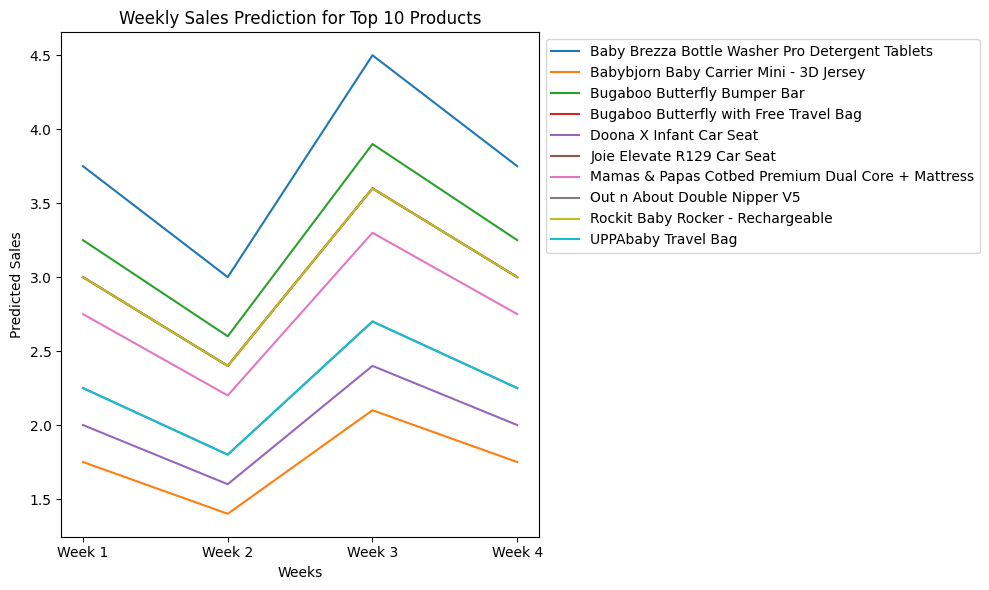

In [ ]:
# Plotting the weekly sales for each product
plt.figure(figsize=(10, 6))
for product in weekly_sales_df['Product Title']:
    product_data = weekly_sales_df[weekly_sales_df['Product Title'] == product]
    plt.plot(['Week 1', 'Week 2', 'Week 3', 'Week 4'],
             product_data[['week_1', 'week_2', 'week_3', 'week_4']].values[0], label=product)

plt.title('Weekly Sales Prediction for Top 10 Products')
plt.xlabel('Weeks')
plt.ylabel('Predicted Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


**Prediction**

In [ ]:
# Example: Using weighted average for next week's prediction
weekly_sales_df['Predicted Sales Next Week'] = weekly_sales_df['week_4'] * 1.1  # Increase by 10%
print(weekly_sales_df[['Product Title', 'Predicted Sales Next Week']])


                                                                                       Product Title  \
Baby Brezza Bottle Washer Pro Detergent Tablets      Baby Brezza Bottle Washer Pro Detergent Tablets   
Babybjorn Baby Carrier Mini - 3D Jersey                      Babybjorn Baby Carrier Mini - 3D Jersey   
Bugaboo Butterfly Bumper Bar                                            Bugaboo Butterfly Bumper Bar   
Bugaboo Butterfly with Free Travel Bag                        Bugaboo Butterfly with Free Travel Bag   
Doona X Infant Car Seat                                                      Doona X Infant Car Seat   
Joie Elevate R129 Car Seat                                                Joie Elevate R129 Car Seat   
Mamas & Papas Cotbed Premium Dual Core + Mattress  Mamas & Papas Cotbed Premium Dual Core + Mattress   
Out n About Double Nipper V5                                            Out n About Double Nipper V5   
Rockit Baby Rocker - Rechargeable                               

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize a list to store predictions
predictions = []

# Iterate over each product to fit a model and predict Week 5
for _, row in weekly_sales_df.iterrows():
    X = np.array([[1], [2], [3], [4]])  # Week numbers as features
    y = np.array([
        row['week_1'],
        row['week_2'],
        row['week_3'],
        row['week_4']
    ])  # Corresponding sales

    model = LinearRegression()
    model.fit(X, y)

    week_5_prediction = model.predict([[5]])[0]

    predictions.append(week_5_prediction)

# Add predictions to DataFrame
weekly_sales_df['Predicted Sales Week 5'] = predictions

# Display final DataFrame
print(weekly_sales_df[['Product Title', 'Predicted Sales Week 5']])


                                                                                       Product Title  \
Baby Brezza Bottle Washer Pro Detergent Tablets      Baby Brezza Bottle Washer Pro Detergent Tablets   
Babybjorn Baby Carrier Mini - 3D Jersey                      Babybjorn Baby Carrier Mini - 3D Jersey   
Bugaboo Butterfly Bumper Bar                                            Bugaboo Butterfly Bumper Bar   
Bugaboo Butterfly with Free Travel Bag                        Bugaboo Butterfly with Free Travel Bag   
Doona X Infant Car Seat                                                      Doona X Infant Car Seat   
Joie Elevate R129 Car Seat                                                Joie Elevate R129 Car Seat   
Mamas & Papas Cotbed Premium Dual Core + Mattress  Mamas & Papas Cotbed Premium Dual Core + Mattress   
Out n About Double Nipper V5                                            Out n About Double Nipper V5   
Rockit Baby Rocker - Rechargeable                               

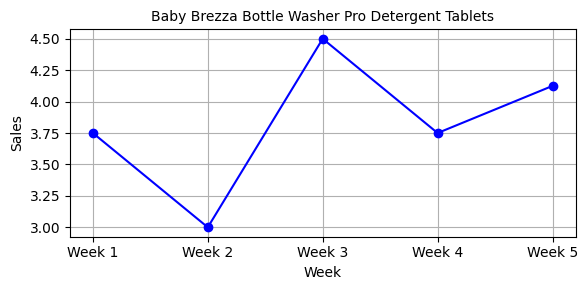

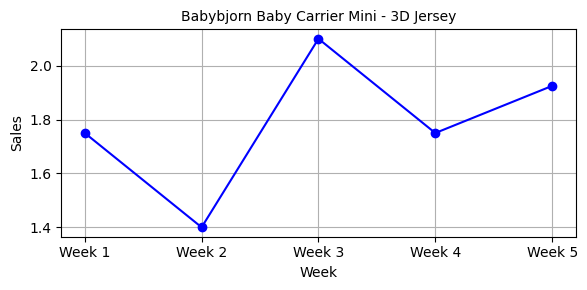

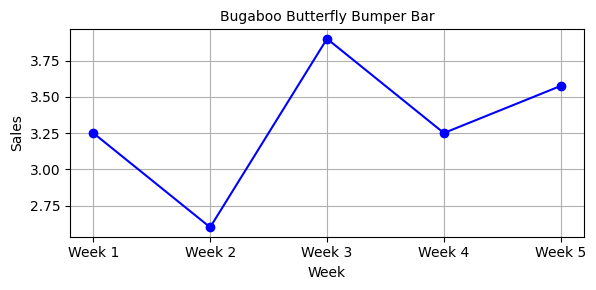

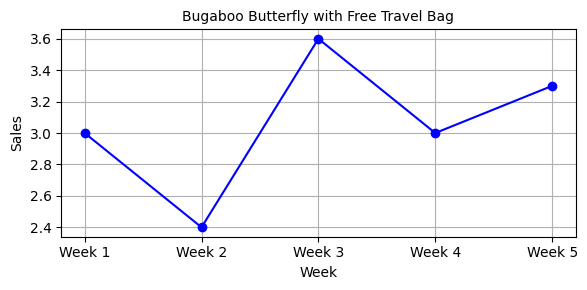

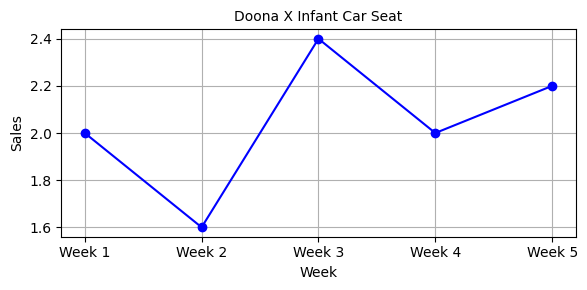

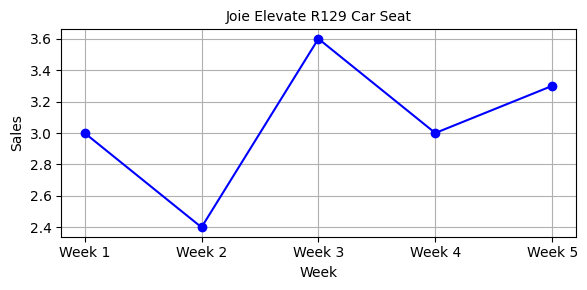

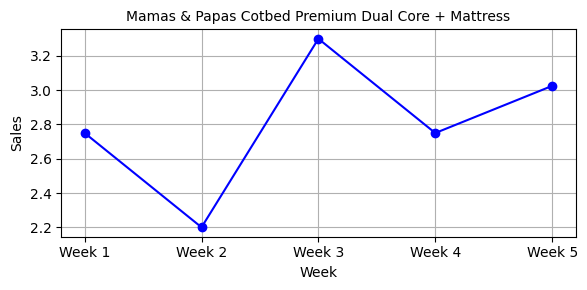

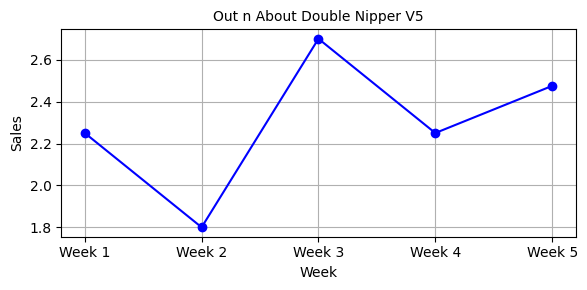

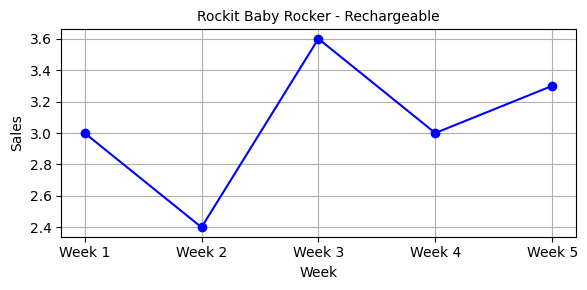

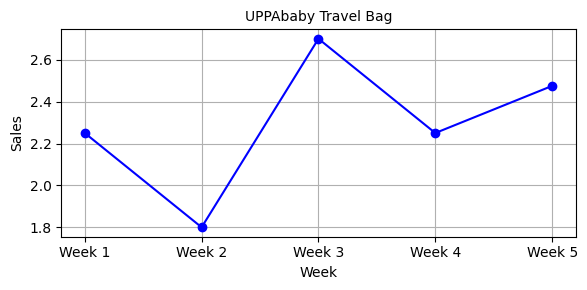

In [ ]:
# Plot sales trend for each product
for _, row in weekly_sales_df.iterrows():
    weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5']
    sales = [
        row['week_1'],
        row['week_2'],
        row['week_3'],
        row['week_4'],
        row['Predicted Sales Week 5']
    ]

    plt.figure(figsize=(6, 3))
    plt.plot(weeks, sales, marker='o', linestyle='-', color='blue')
    plt.title(row['Product Title'], fontsize=10)
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Low Stock Report

In [ ]:
import pandas as pd
import numpy as np

# Sample data: Product titles and predicted sales
data = {
    'Product Title': [
        'Baby Brezza Bottle Washer Pro Detergent Tablets',
        'Babybjorn Baby Carrier Mini - 3D Jersey',
        'Bugaboo Butterfly Bumper Bar',
        'Bugaboo Butterfly with Free Travel Bag',
        'Doona X Infant Car Seat',
        'Joie Elevate R129 Car Seat',
        'Mamas & Papas Cotbed Premium Dual Core + Mattress',
        'Out n About Double Nipper V5',
        'Rockit Baby Rocker - Rechargeable',
        'UPPAbaby Travel Bag'
    ],
    'Predicted Sales for Week 5': [
        4.125, 1.925, 3.575, 3.300, 2.200, 3.300, 3.025, 2.475, 3.300, 2.475
    ]
}

# Create DataFrame from the sample data
df = pd.DataFrame(data)

# Simulated stock levels (Replace with actual data if you have it)
stock_levels = {
    'Baby Brezza Bottle Washer Pro Detergent Tablets': 10,
    'Babybjorn Baby Carrier Mini - 3D Jersey': 5,
    'Bugaboo Butterfly Bumper Bar': 8,
    'Bugaboo Butterfly with Free Travel Bag': 7,
    'Doona X Infant Car Seat': 6,
    'Joie Elevate R129 Car Seat': 7,
    'Mamas & Papas Cotbed Premium Dual Core + Mattress': 6,
    'Out n About Double Nipper V5': 5,
    'Rockit Baby Rocker - Rechargeable': 8,
    'UPPAbaby Travel Bag': 6
}

# Adding stock levels to the DataFrame
df['Stock Level'] = df['Product Title'].map(stock_levels)

# Add a column to flag products with low stock (where predicted sales exceed stock)
df['Low Stock'] = np.where(df['Predicted Sales for Week 5'] > df['Stock Level'], 'Low Stock', 'In Stock')

# Display the DataFrame with the Low Stock evaluation
print(df)


                                       Product Title  \
0    Baby Brezza Bottle Washer Pro Detergent Tablets   
1            Babybjorn Baby Carrier Mini - 3D Jersey   
2                       Bugaboo Butterfly Bumper Bar   
3             Bugaboo Butterfly with Free Travel Bag   
4                            Doona X Infant Car Seat   
5                         Joie Elevate R129 Car Seat   
6  Mamas & Papas Cotbed Premium Dual Core + Mattress   
7                       Out n About Double Nipper V5   
8                  Rockit Baby Rocker - Rechargeable   
9                                UPPAbaby Travel Bag   

   Predicted Sales for Week 5  Stock Level Low Stock  
0                       4.125           10  In Stock  
1                       1.925            5  In Stock  
2                       3.575            8  In Stock  
3                       3.300            7  In Stock  
4                       2.200            6  In Stock  
5                       3.300            7  In Stock 

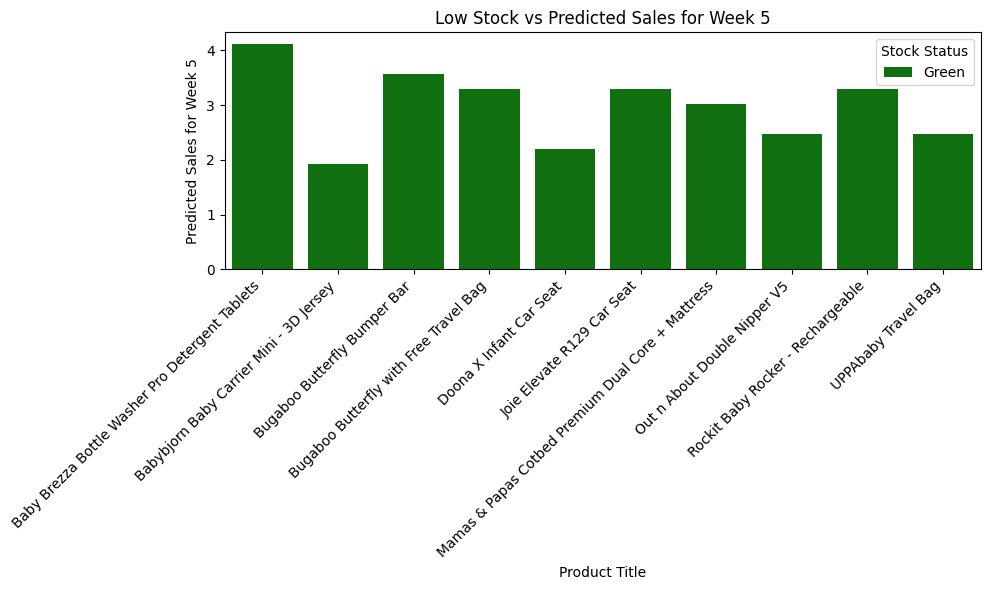

In [ ]:
# Create a new column to use as a color for the bar chart (based on Low Stock status)
df['Stock Status'] = np.where(df['Low Stock'] == 'Low Stock', 'Red', 'Green')

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot with colors based on stock status
sns.barplot(data=df, x='Product Title', y='Predicted Sales for Week 5', hue='Stock Status', dodge=False, palette={'Red': 'red', 'Green': 'green'})

# Rotate product titles for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Product Title')
plt.ylabel('Predicted Sales for Week 5')
plt.title('Low Stock vs Predicted Sales for Week 5')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("weekly_sales_with_low_stock.csv", index=False)


In [ ]:
# Load the two CSVs
file_path_1 = 'top_10_selling_products_simple.csv'
file_path_2 = 'weekly_sales_with_low_stock.csv'
df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)


In [ ]:
# Make sure both dataframes have the same column name
df_1.rename(columns={'product_title': 'Product Title'}, inplace=True)
df_2.rename(columns={'product_title': 'Product Title'}, inplace=True)

# Now merge should work fine
merged_df = pd.merge(df_1, df_2, on='Product Title', how='inner')


In [ ]:
merged_df = pd.merge(df_1, df_2, on='Product Title', how='inner')


In [ ]:
merged_df.to_csv("merged_sales_with_predictions.csv", index=False)


In [ ]:
from google.colab import files
files.download("merged_sales_with_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>